<a href="https://colab.research.google.com/github/RezuanChowdhuryRifat/SETI-Signal-Classification/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
from keras import layers
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16
import tensorflow as tf

# Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/dataset

/content/drive/MyDrive/dataset


**Preprocessing**

In [5]:
train_path = "/content/drive/MyDrive/dataset/train"
test_path = "/content/drive/MyDrive/dataset/test"
valid_path = "/content/drive/MyDrive/dataset/valid"


SIZE = 256  #Resize images
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(train_path, image_size=(SIZE,SIZE),batch_size=batch_size, shuffle=True,
                                                               seed=123, label_mode='categorical')
valid_ds = tf.keras.preprocessing.image_dataset_from_directory(valid_path, image_size=(SIZE,SIZE),batch_size=batch_size, shuffle=False,
                                                               seed=123, label_mode='categorical')
test_ds = tf.keras.preprocessing.image_dataset_from_directory(test_path, image_size=(SIZE,SIZE), batch_size=batch_size, shuffle=False,
                                                              seed=123, label_mode='categorical')

Found 5600 files belonging to 7 classes.
Found 700 files belonging to 7 classes.
Found 700 files belonging to 7 classes.


**Plot data**

Found 700 files belonging to 7 classes.


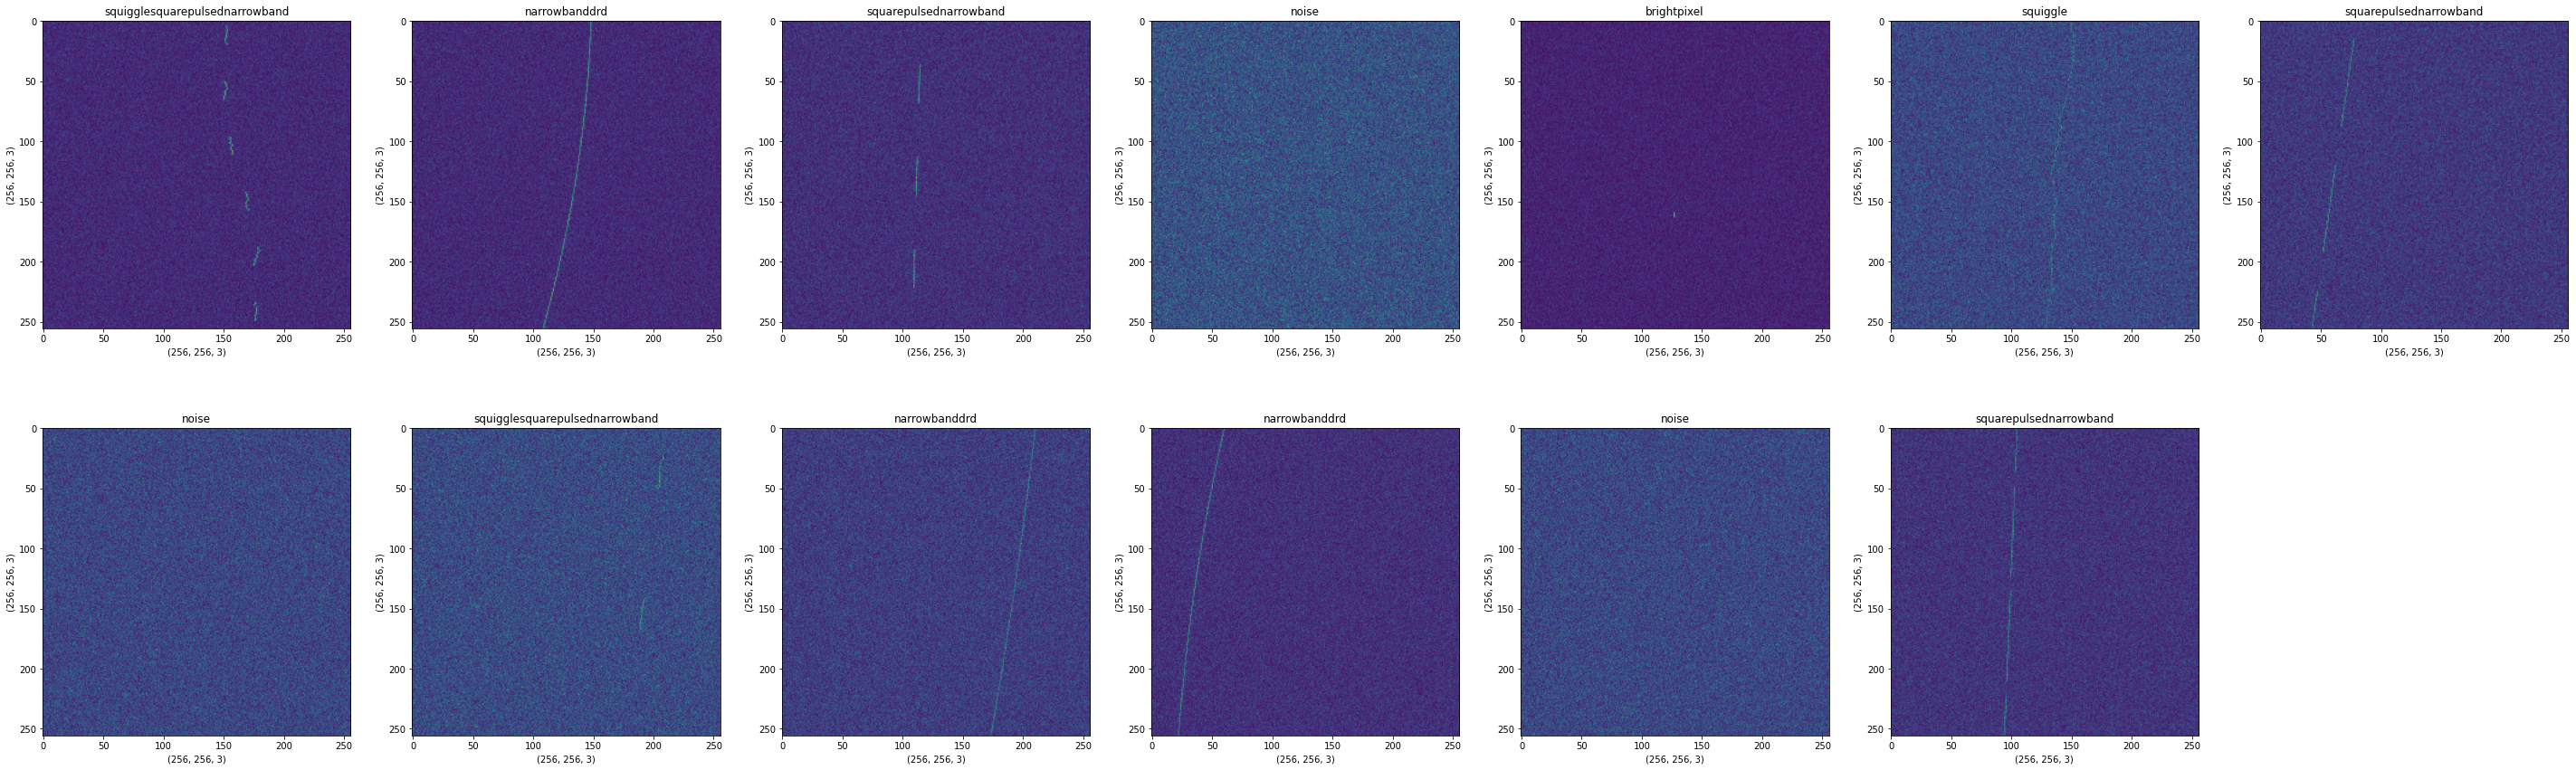

In [24]:
x_ds = tf.keras.preprocessing.image_dataset_from_directory(valid_path, image_size=(SIZE,SIZE),batch_size=batch_size, shuffle=True,)
classes_list = sorted(os.listdir(valid_path))
plt.figure(figsize=(50, 40))
for images, labels in x_ds.take(1):
    for i in range(1, 14):
        plt.subplot(5, 7, i)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes_list[labels[i]])
        plt.xlabel(images[i].numpy().astype("uint8").shape)
        plt.ylabel(images[i].numpy().astype("uint8").shape)

In [6]:
for img_batch, label_batch in train_ds.take(1):
    print('image batch shape: ', img_batch.shape)
    print('label_batch shape: ', label_batch.shape)

image batch shape:  (32, 256, 256, 3)
label_batch shape:  (32, 7)


In [7]:
for img_batch, label_batch in valid_ds.take(1):
    print('image batch shape: ', img_batch.shape)
    print('label_batch shape: ', label_batch.shape)

image batch shape:  (32, 256, 256, 3)
label_batch shape:  (32, 7)


# Model

In [8]:
model= Sequential([
    layers.Resizing(SIZE, SIZE),
    layers.Rescaling(1./255, input_shape=(256,256,3)),
    
    
    layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(5,5)),
    
    layers.Conv2D(64, kernel_size= 3, activation= 'relu', padding='same'),
    layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(5,5)),
    layers.Dropout(0.1),
    

    layers.Conv2D(128, kernel_size= 3, activation= 'relu', padding='same'),
    layers.Dropout(0.2),
    layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'),
    layers.Dropout(0.2),
    layers.Conv2D(128, kernel_size= 3, activation= 'relu', padding='same'),
    layers.MaxPooling2D(pool_size=(4,4)),
    layers.Dropout(0.2),

    
    layers.Flatten(),
    
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.15),
    
    layers.Dense(7, activation='softmax')
])


In [9]:
model.compile(loss="categorical_crossentropy",optimizer="adam",
                       metrics=["accuracy"])

**Training**

In [10]:
history = model.fit(train_ds, epochs= 50, batch_size=32, validation_data=valid_ds)

Epoch 1/50
175/175 [==============================] - 64s 295ms/step - loss: 1.8308 - accuracy: 0.2304 - val_loss: 1.7438 - val_accuracy: 0.2429
Epoch 2/50
175/175 [==============================] - 50s 273ms/step - loss: 1.7658 - accuracy: 0.2650 - val_loss: 1.8020 - val_accuracy: 0.2371
Epoch 3/50
175/175 [==============================] - 67s 371ms/step - loss: 1.7560 - accuracy: 0.2879 - val_loss: 1.7063 - val_accuracy: 0.3414
Epoch 4/50
175/175 [==============================] - 51s 279ms/step - loss: 1.5814 - accuracy: 0.3579 - val_loss: 1.4940 - val_accuracy: 0.4229
Epoch 5/50
175/175 [==============================] - 54s 296ms/step - loss: 1.4192 - accuracy: 0.4304 - val_loss: 1.1968 - val_accuracy: 0.5214
Epoch 6/50
175/175 [==============================] - 56s 304ms/step - loss: 1.1485 - accuracy: 0.5464 - val_loss: 1.2471 - val_accuracy: 0.4829
Epoch 7/50
175/175 [==============================] - 51s 280ms/step - loss: 0.9465 - accuracy: 0.6229 - val_loss: 1.1373 - val_ac

**Plot grapgh**

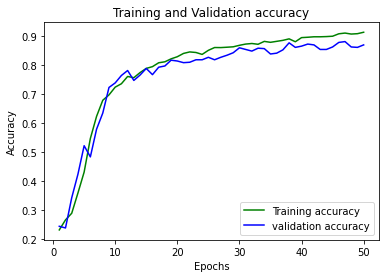

In [17]:
accuracy = history.history['accuracy']
accuracy_val= history.history['val_accuracy']
epochs= range(1,51)
plt.plot(epochs, accuracy, 'g', label='Training accuracy')
plt.plot(epochs, accuracy_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

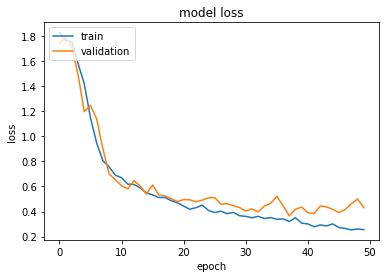

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Testing**

In [21]:
model.evaluate(train_ds)

175/175 [==============================] - 41s 223ms/step - loss: 0.1766 - accuracy: 0.9398


[0.17661823332309723, 0.9398214221000671]

**Model save**

In [22]:
model.save("/content/drive/MyDrive/dataset/model")